# Scraping csv files from DataCamp

Over time I've seen a lot of requests for getting all of the dataset from DataCamp in 1 eazy place. This project uses Beautiful Soup and regex to find all of the .csv files on the DataCamp site and download them to a local folder. It is possible not the most effecient or elegant way to do it but it seems to work.

## manually download a csv

In [ ]:
import pandas as pd
url='https://assets.datacamp.com/production/course_2072/datasets/company-stock-movements-2010-2015-incl.csv'
y=url.split('/')
destination='Data/Csv1/'+(y[-1])
df=pd.read_csv(url,sep=',')
df.to_csv(destination)

### get the links to courses

Initially we will use Beautiful Soup to look at the courses folder on datacamp and bring back the html text. It will then extract all of the a_tags to find the links containing courses/ extract the href then to list courses.

In [1]:
# Import packages
import requests
from bs4 import BeautifulSoup
import re

# Specify url
url = 'https://campus.datacamp.com/courses/unsupervised-learning-in-python/clustering-for-dataset-exploration?ex=1'
# Package the request, send the request and catch the response: r
r = requests.get(url)
# Extracts the response as html: html_doc
html_doc = r.text

# create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc, "lxml")

# Find all 'a' tags (which define hyperlinks): a_tags
a_tags=soup.find_all('a')

# Extract the /courses pages
courses=[]
pattern = re.compile("/courses//*")
for link in a_tags:
    match = re.findall(pattern, str(link))
    if match:
        courses.append(link.get('href'))  
# print(courses) 

### get all the links from courses to .csv files

We pretty much repeat the previous steps, except this time instead of looking at one page we look at the list of course pages we created in the first step. 

In [2]:
csv=[]
for course in courses:    
    # print(course) 
    
    # Specify url
    url = "https://campus.datacamp.com/courses/unsupervised-learning-in-python/clustering-for-dataset-exploration?ex=1"+course    
    # Package the request, send the request and catch the response: r
    r = requests.get(url)
    # Extracts the response as html: html_doc
    html_doc = r.text

    # create a BeautifulSoup object from the HTML: soup
    soup = BeautifulSoup(html_doc, "lxml")
    
    # Find all 'a' tags (which define hyperlinks): a_tags
    a_tags1=soup.find_all('a')
    
    pattern = re.compile("csv/*")    
    # append the URLs to list
    for link in a_tags1:
        match = re.findall(pattern, str(link))
        if match:
            csv.append(link.get('href'))
print(csv)

[]


### get the csv's  and save locally

We are going to use pandas pd.read_csv() and df.to_csv() methods to take the file and save it to a local folder. We'll also create a text file to document what we've done.

In [94]:
import pandas as pd
codebook='Data/Csv/codebook.txt'

for file in csv:
    y=file.split('/')
    destination='Data/Csv/'+(y[-1])
    df=pd.read_csv(file)
    df.to_csv(destination)

    with open(codebook, "a") as f:
        f.write("source : " + file)

### Putting it all together

In this notebook i split out each element of the process so that i could ensure each element work before moving onto the next. Now i will but it all into a single snipet of scripy that i ca save as a .py file to share and run when required.

In [4]:
### A python script to collect all of the .csv files from DataCamp ###
### and copy them to a folder named Data in the currect directory. ###
### Created 3/3/18 by David coxon ###

# Import packages
import requests
from bs4 import BeautifulSoup
import re
import datetime
import pandas as pd

codebook='Data/Csv/importedcsv.txt'
now = datetime.datetime.now()
now = str(now)
# Specify url
url = 'https://campus.datacamp.com/courses/unsupervised-learning-in-python/'
# Package the request, send the request and catch the response: r
r = requests.get(url)
html_doc = r.text

# create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc, "lxml")

# Find all 'a' tags (which define hyperlinks): a_tags
a_tags=soup.find_all('a')

# Extract the /courses pages
courses=[]
pattern = re.compile("/courses//*")
for link in a_tags:
    match = re.findall(pattern, str(link))
    if match:
        courses.append(link.get('href'))   

# iterate over list of courses getting links to csv files
csv=[]     
for course in courses:    
    
    # Specify url
    url = "https://campus.datacamp.com/courses/unsupervised-learning-in-python/"  
    # Package the request, send the request and catch the response: r
    r = requests.get(url)
    # Extracts the response as html: html_doc
    html_doc = r.text

    # create a BeautifulSoup object from the HTML: soup
    soup = BeautifulSoup(html_doc, "lxml")
    
    # Find all 'a' tags (which define hyperlinks): a_tags
    a_tags1=soup.find_all('a')

    # append the URLs to csv list
    pattern = re.compile("csv/*")        
    for link in a_tags1:
        match = re.findall(pattern, str(link))
        if match:
            csv.append(link.get('href')) 

# open Csv files and copy to Local device           
for file in csv:
    y=file.split('/')
    destination='Data/Csv/'+(y[-1])
    df=pd.read_csv(file)
    df.to_csv(destination)

    # Document which files were collected
    with open(codebook, "a") as f:
        f.write("\nsource : " + file + " dated collected : " + now)
print(str(len(csv)) + " csv files checked!")

0 csv files checked!


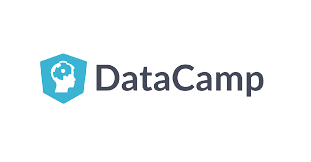